In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# all GENIE CC interactions
Oct 23, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/GENIECCInteractions/'

# µp-events: general features
### To this end, we collect all CC events in which at least one proton was produced together with the muon

In [3]:
# GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_02_10_genie.csv')
print len(GENIEall),' GENIE interaction'

96374  GENIE interaction


In [4]:
CC_Np_200MeVc = GENIEall[(GENIEall['IsCC_Np_200MeVc']==True)]
CC_Np_200MeVc_contained = CC_Np_200MeVc[(CC_Np_200MeVc['IsVertexContained']==True)]
CC_Np_200MeVc_mu_reco = CC_Np_200MeVc_contained[(CC_Np_200MeVc_contained['Is_mu_TrackReconstructed']==True)]
CC_Np_200MeVc_mu_recoInFV = CC_Np_200MeVc_mu_reco[(CC_Np_200MeVc_mu_reco['Is_mu_TrackInFV']==True)]
CC_Np_200MeVc_vertex_recoInFV = CC_Np_200MeVc_mu_recoInFV[(CC_Np_200MeVc_mu_recoInFV['IsVertexReconstructed']==True)&(CC_Np_200MeVc_mu_recoInFV['IsVertexInFV']==True)]

mup_df=pd.DataFrame({'name':[r'$1{\mu} N_{p>200 MeV/c}$'
                                ,r'$\\nu$-int. in 89 tons'
                                ,r'$\mu$ reconstructed'
                                ,r'$\mu$ reconstructed and in FV'
                                ,r'$\mu+ N_p$ tracks reco. in FV'
                             ]
                     ,'label':[r'1$\mu$, at least 1$p>200$ MeV/c'
                                ,r'$\nu$ - interaction contained in active volume'
                                ,r'$\mu$ track reconstructed'
                                ,r'$\mu$ track reconstructed and contained in FV'
                                ,r'$\mu$ and at least one $p$ tracks reconstructed and contained in FV'
                             ]
                       ,'sample':[CC_Np_200MeVc
                                  ,CC_Np_200MeVc_contained
                                  ,CC_Np_200MeVc_mu_reco
                                  ,CC_Np_200MeVc_mu_recoInFV
                                  ,CC_Np_200MeVc_vertex_recoInFV
                                 ]
                       ,'len(sample)':[len(CC_Np_200MeVc)
                                  ,len(CC_Np_200MeVc_contained)
                                  ,len(CC_Np_200MeVc_mu_reco)
                                  ,len(CC_Np_200MeVc_mu_recoInFV)
                                  ,len(CC_Np_200MeVc_vertex_recoInFV)
                                 ]
                     ,'color':['blue'                   
                               , 'red' 
                               , 'orange'
                               , 'green'             
                               , 'black']
                    })
mup_df['frac(sample) [%]'] = mup_df['len(sample)']/len(CC_Np_200MeVc)*100
print mup_df[['name','len(sample)','frac(sample) [%]']]

                            name  len(sample)  frac(sample) [%]
0       $1{\mu} N_{p>200 MeV/c}$        59540        100.000000
1         $\\nu$-int. in 89 tons        26686         44.820289
2            $\mu$ reconstructed        21963         36.887807
3  $\mu$ reconstructed and in FV        13503         22.678871
4  $\mu+ N_p$ tracks reco. in FV         7663         12.870339


7663
len(x[x>11]): 539 len(x[x<=11]): 7124
92.9662012267 %


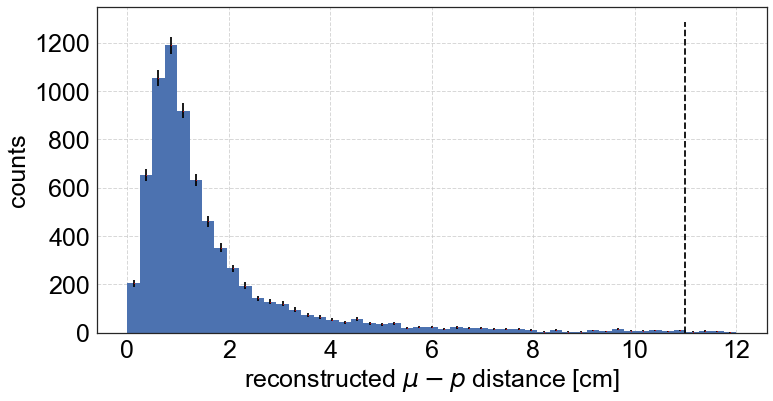

In [5]:
# fig:mup_distance
bins=np.linspace(0,12,50) #np.linspace(-1,400,500) #  
mupEvents = CC_Np_200MeVc_vertex_recoInFV
print len(mupEvents)
x = mupEvents['reconstructed mu-p distance']
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=bins) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , 'counts'
         , fontsize=25 
         , do_add_grid=True)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.savefig(figures_path+'mup_distance.pdf')

# how many of the µp pairs are retained for a cut < 11 cm?
print 'len(x[x>11]):',len(x[x>11]),'len(x[x<=11]):',len(x[x<=11])
print 100.*float(len(mupEvents[mupEvents['reconstructed mu-p distance']<11]))/len(mupEvents),'%'

## un-reconstructed events

In [6]:
## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [7]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))

    for sample,label,color in zip([CC_Np_200MeVc_mu_recoInFV,CC_Np_200MeVc_vertex_recoInFV]
                                  ,['all protons','proton reconstructed']
                                  ,['black','royalblue','salmon']):

        x = mul*sample[var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1]) 
        y = h.astype(float)# /len(x)
        yerr=1./np.sqrt(h)#/len(x)
        ax.errorbar( mid, y, yerr=yerr, xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)    
    set_axes(ax,xlabel , 'counts', fontsize=25,xticks=xticks,do_add_grid=True,do_add_legend=True,legend_loc='upper right')
    plt.savefig(figures_path+'ProtonRecoUnreco_'+var+'.pdf')

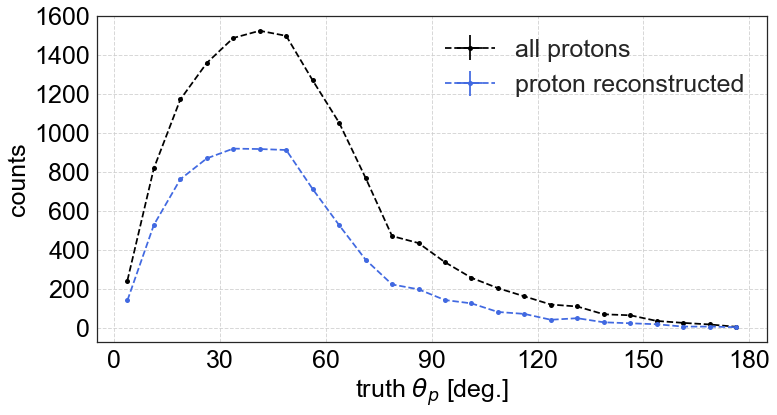

In [8]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]'
                        ,mul=180./np.pi,bins=np.linspace(0,180,25),xticks=np.linspace(0,180,7))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


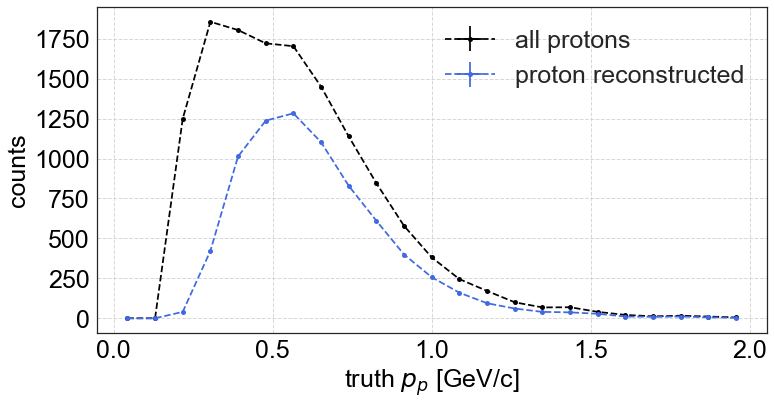

In [9]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,24),xticks=np.linspace(0,2,5))

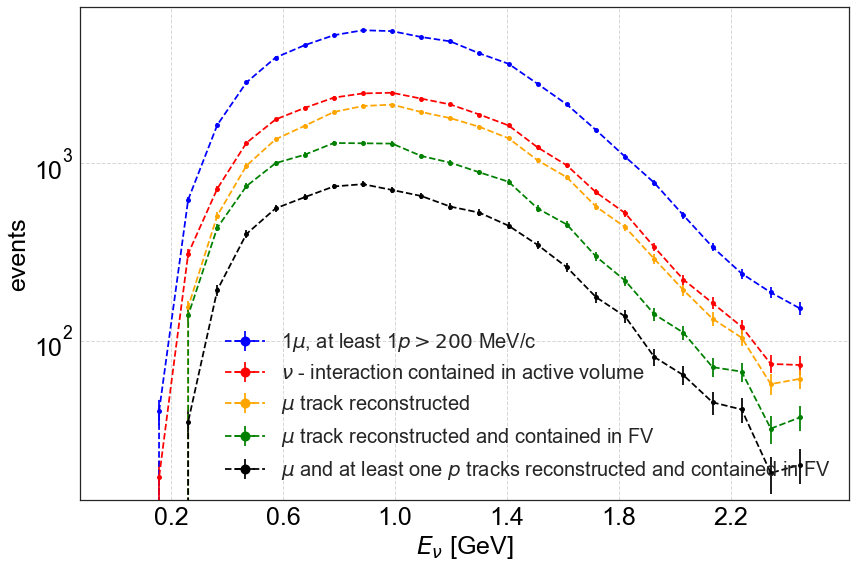

In [10]:
# fig:mupEv
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=[0.2,0.6,1.0,1.4,1.8,2.2],yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


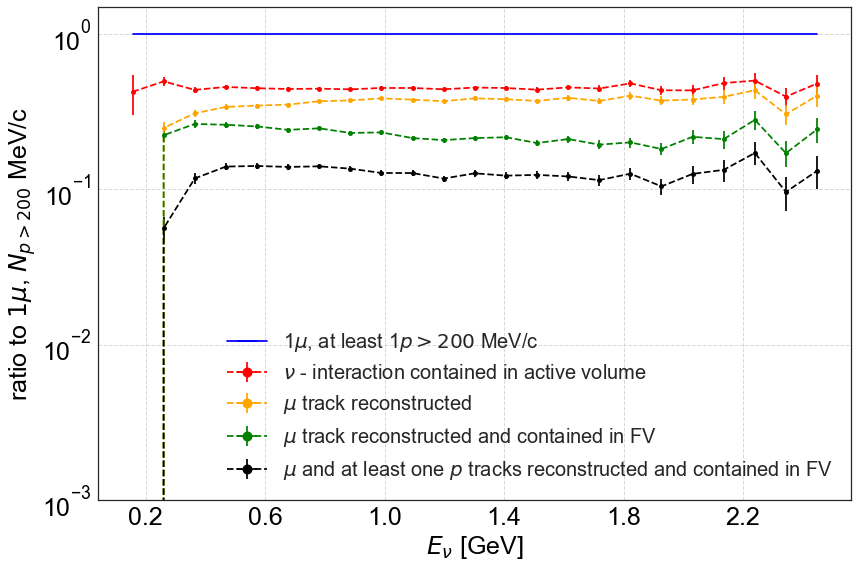

In [11]:
# fig:mupEv_ratios
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Ev'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Ev'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,do_add_grid=True
         ,xticks=[0.2,0.6,1.0,1.4,1.8,2.2]
         ,ylim=(1e-3,1.5)
#          ,yticks=[1,10,100,1000]
        )
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupEv_ratio.pdf')

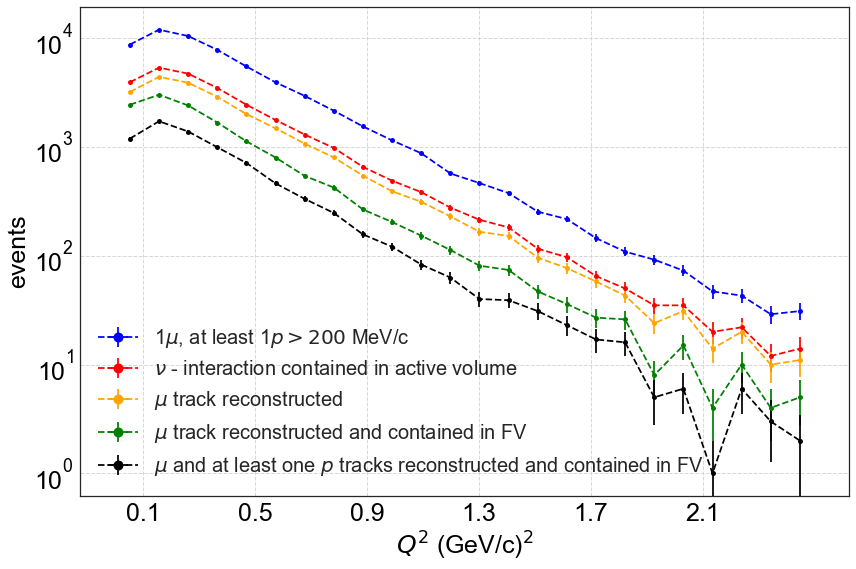

In [12]:
# fig:mupQ2
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Q2'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=[0.1,0.5,0.9,1.3,1.7,2.1],yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupQ2.pdf')

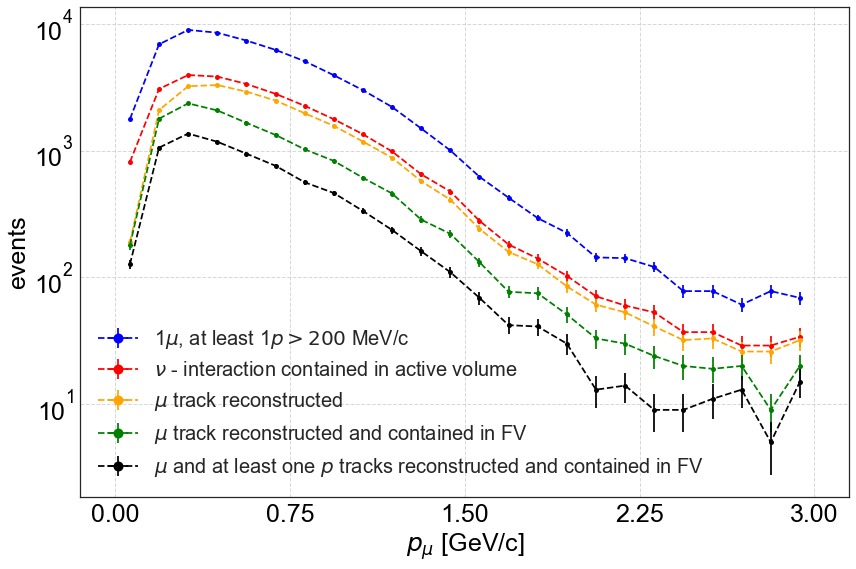

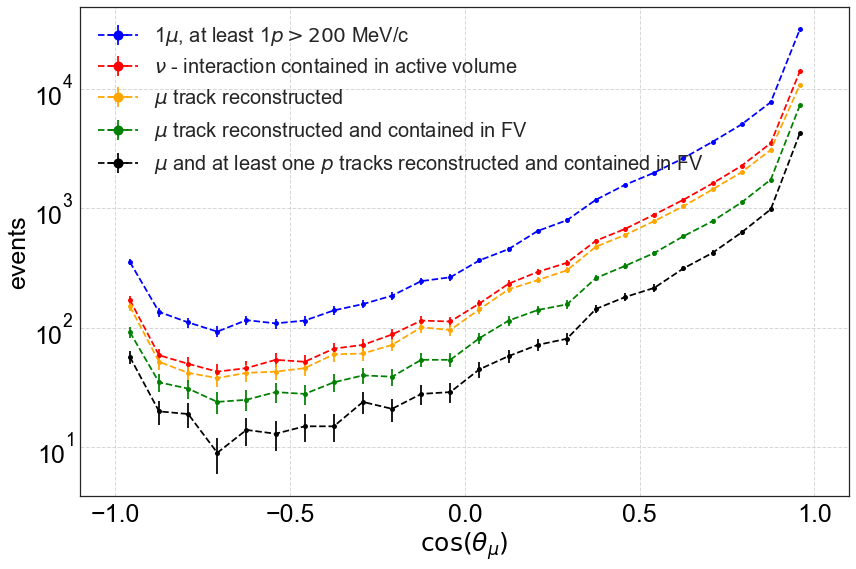

In [13]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Pmu'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label='events',fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,yticks=[1,10,100,1000]
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum.pdf')

# fig:true_mup_cos_truth_Pmu_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(np.cos(sample['truth_Pmu_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='upper left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label='events',fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,yticks=[1,10,100,1000,10000]
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta.pdf')

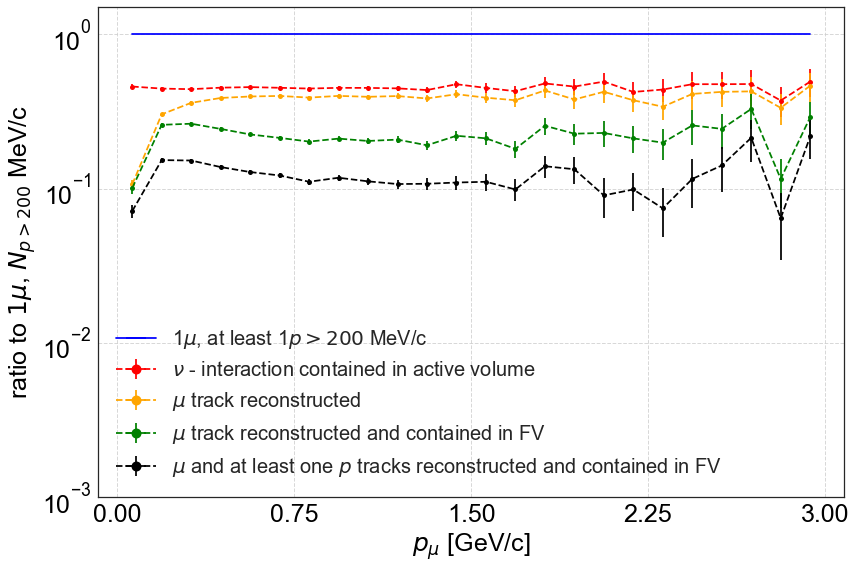

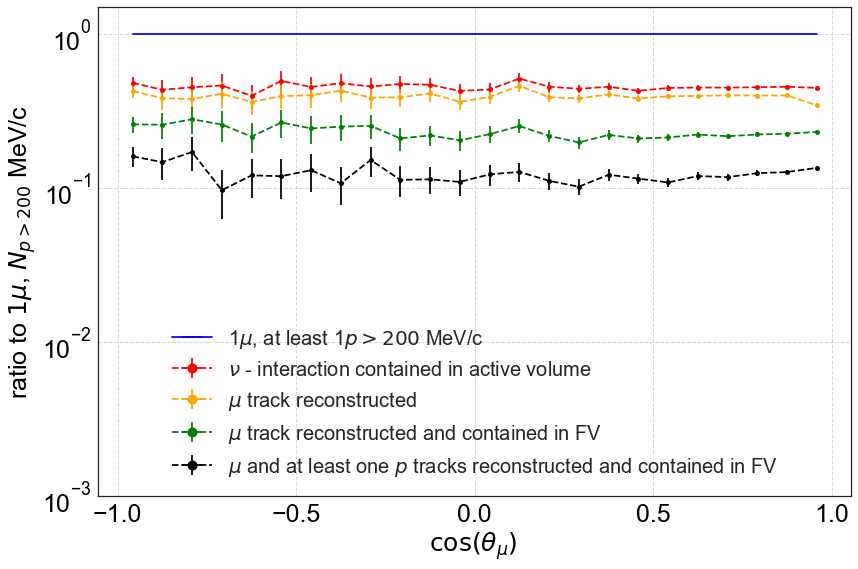

In [14]:
# fig:true_mup_truth_Pmu_momentum_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Pmu'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Pmu'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum_ratio.pdf')

# fig:true_mup_cos_truth_Pmu_theta_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
h_CC_Np_200MeVc,bins = np.histogram(np.cos(CC_Np_200MeVc['truth_Pmu_theta']),bins=bins)
for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(np.cos(sample['truth_Pmu_theta']),bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)

ax.legend(loc='lower center',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta_ratio.pdf')

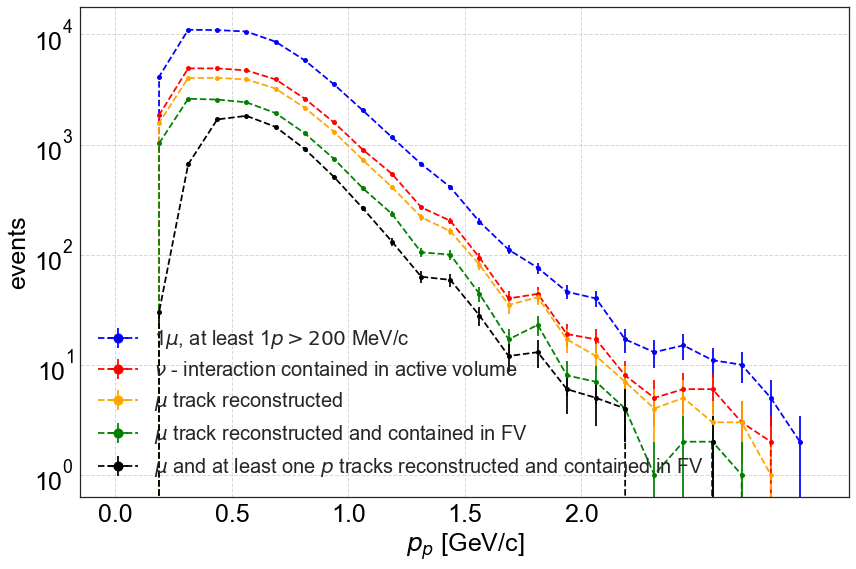

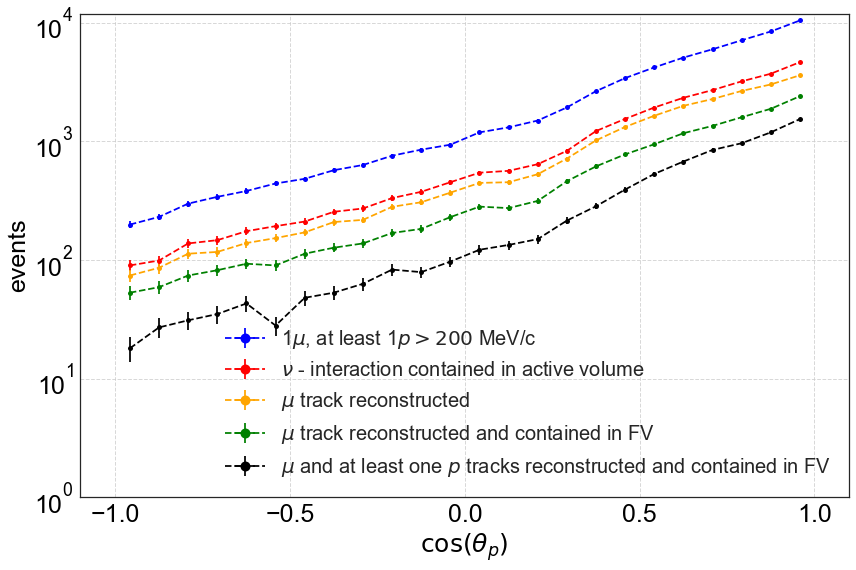

In [15]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Pp'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=np.linspace(0,2,5),yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum.pdf')

# fig:true_mup_cos_truth_Pp_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(np.cos(sample['truth_Pp_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{p})$ ',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=np.linspace(-1,1,5),yticks=[10,100,1000],ylim=(1,12000))
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply


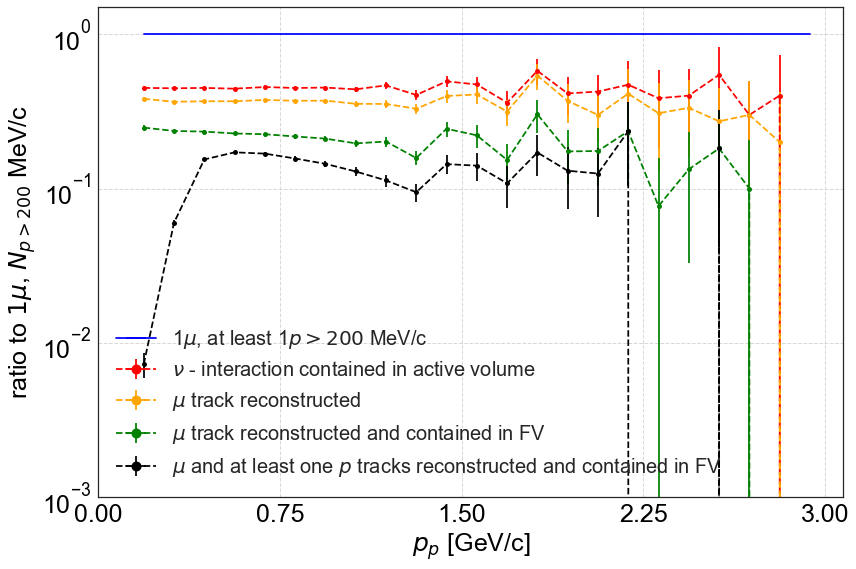

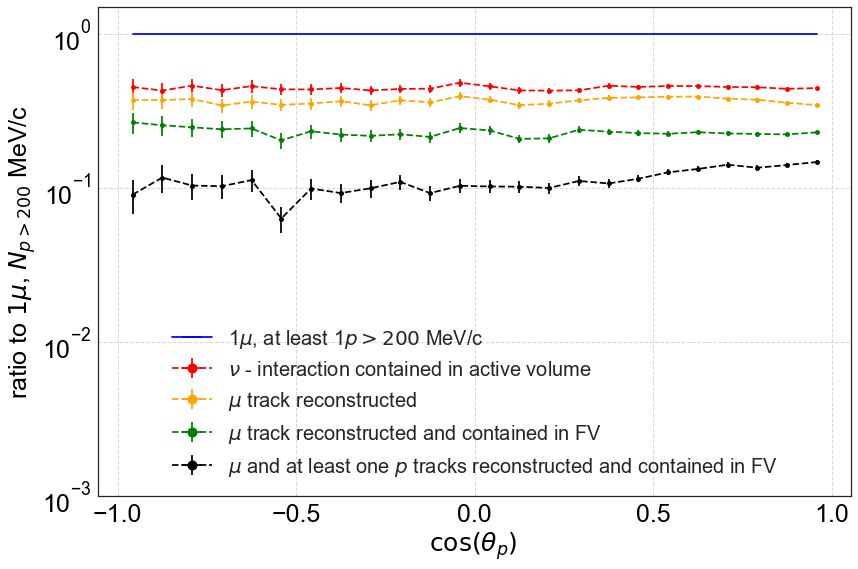

In [16]:
# fig:true_mup_truth_Pmu_momentum_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Pp'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Pp'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$p_{p}$ [GeV/c]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum_ratio.pdf')

# fig:true_mup_cos_truth_Pmu_theta_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
h_CC_Np_200MeVc,bins = np.histogram(np.cos(CC_Np_200MeVc['truth_Pp_theta']),bins=bins)
for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(np.cos(sample['truth_Pp_theta']),bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)

ax.legend(loc='lower center',fontsize=20,markerscale=2.)
set_axes(ax,x_label=r'$\cos(\theta_{p})$ ',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta_ratio.pdf')

In [17]:
sample=CC_Np_200MeVc_vertex_recoInFV

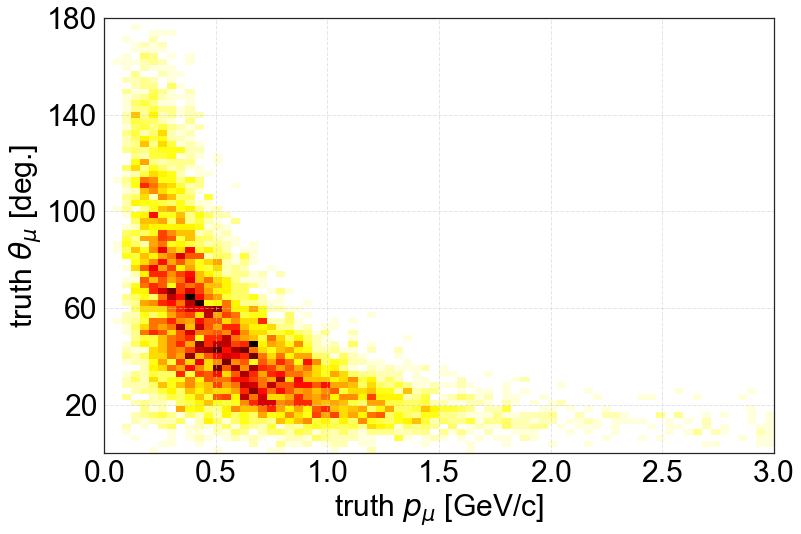

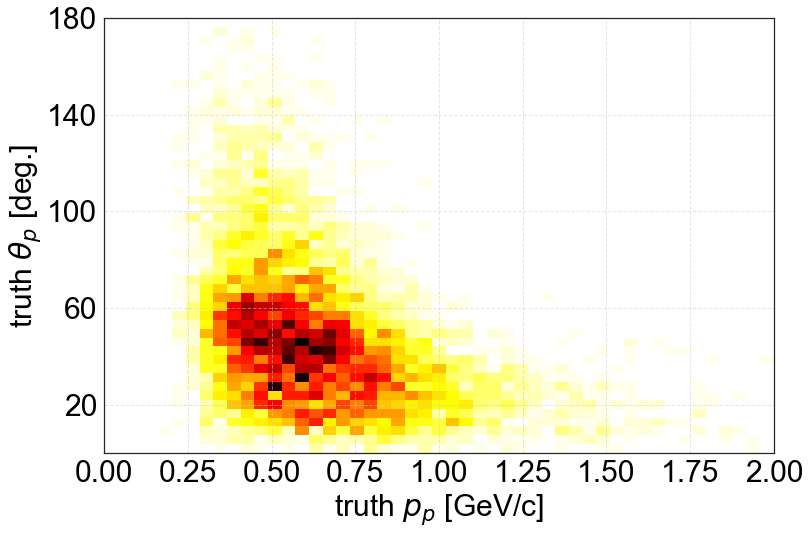

In [22]:
# fig:truth_Pmu_theta_mu
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,75),np.linspace(0,180,75))
plot_2d_hist(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_x'] #sample['truth_Pmu_theta']
             ,bins=bins,ax=ax)
# ax.hexbin(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta'],bins=75,cmap='hot_r')
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{\\mu}$ [GeV/c]',y_label='truth $\\theta_{\\mu}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_mu.pdf')

# fig:truth_Pmu_theta_p
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,2,50),np.linspace(0,180,50))
plot_2d_hist(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta']
             ,bins=bins,ax=ax)
# ax.hexbin(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta'],bins=75,cmap='hot_r')

ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{p}$ [GeV/c]',y_label='truth $\\theta_{p}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_p.pdf')